## Continental shelves

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr
from os import walk
import pickle
from pathlib import Path
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
import matplotlib.colors as colors

from os import walk  
import torch.nn.functional as F
import sys

module_path = Path().resolve().parents[1] / "src" / "preprocessing"

# Append the directory to sys.path
sys.path.append(str(module_path))


from makeTrainingFeatures import *


#your current directory
import os
currdir = os.getcwd()
#os.chdir(currdir)

/gxfs_home/cau/sunms498/.conda/envs/pytorch/lib/python3.11/site-packages/xarray/backends/cfgrib_.py:27: UserWarning: Failed to load cfgrib - most likely there is a problem accessing the ecCodes library. Try `import cfgrib` to get the full error message
  warnings.warn(


In [2]:
# Define file paths
data_path = Path().resolve().parents[1] / 'data' / 'raw' / 'labels'
toc_labels_file = "toc_continentalshelves.csv"
lee_features_path = Path().resolve().parents[1] / 'data' / 'raw' / 'features' / 'FeaturesPhrampusLee_TOCSedRate_updated'
feature_selection_path = Path().resolve().parents[1] / 'data' / 'interim' / 'selectedFeatureLists' / 'selectedfeatures_v_men.txt'
save_path = Path().resolve().parents[1] / 'data' / 'interim' / 'inputfeatures' / 'SedTOCFeaturesnoNAN_TOC_CS_men'


In [3]:
# Read data
df = pd.read_csv(Path(data_path / toc_labels_file))
df = df[["Latitude", "Longitude", "TOC [%]"]]
df = df[df["Longitude"] > -180]
df = df.dropna(how="any")

/tmp/ipykernel_3274321/2266977445.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


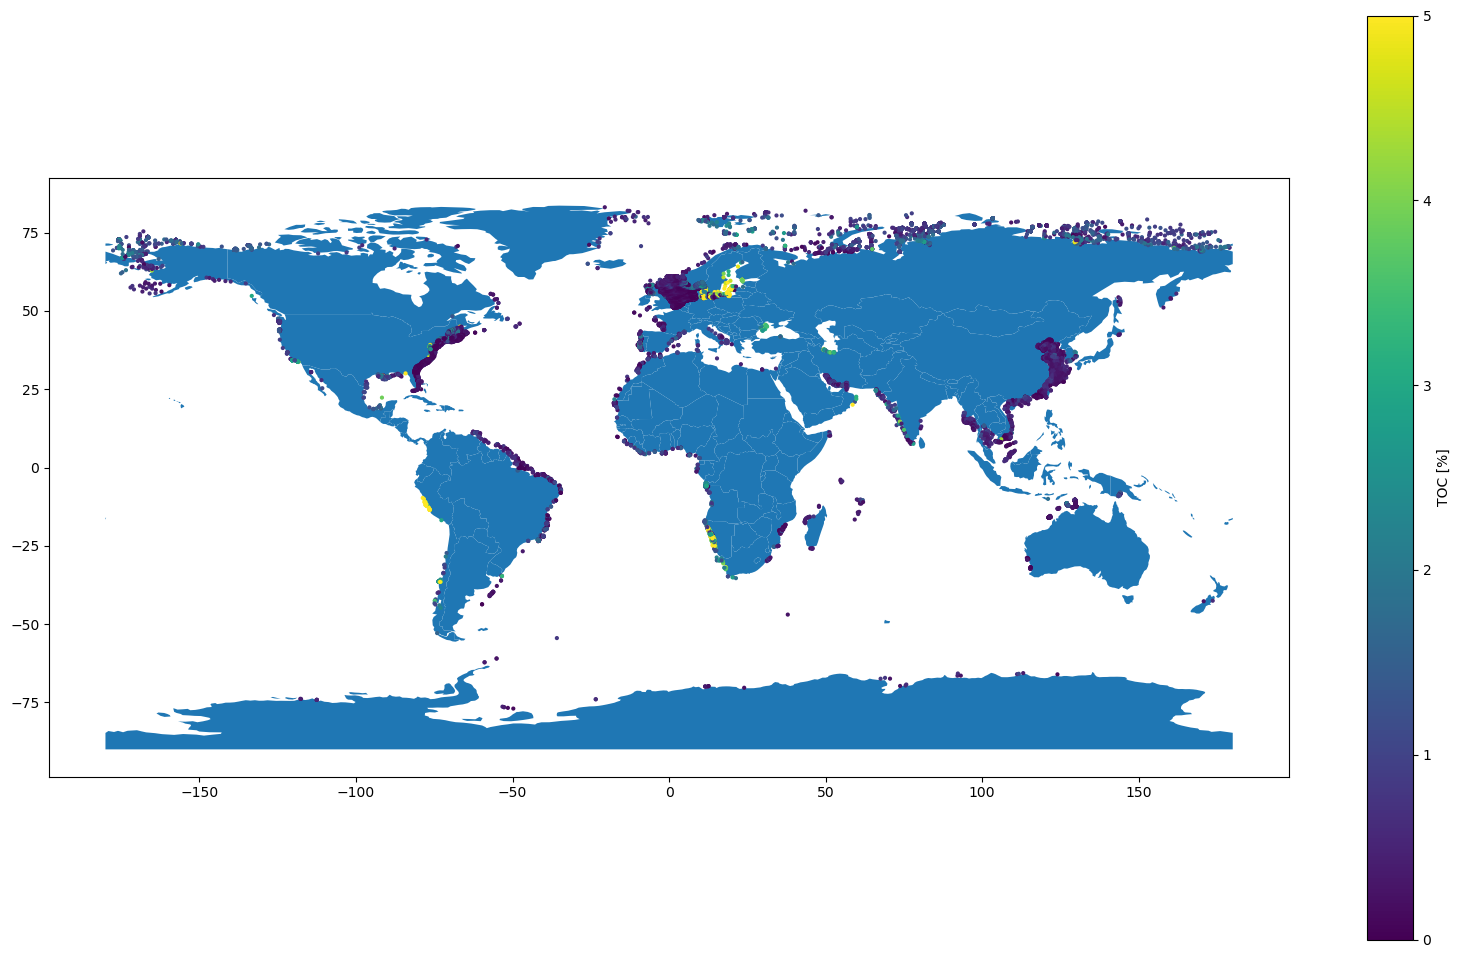

In [4]:
# Plot TOC on map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
plot_toc_on_map(df, world)

In [5]:
# Select features
selected_files = select_features(lee_features_path, feature_selection_path)

Actual number of features
475
Selected number of features
139


In [6]:
# Process features
features, mean, std = process_features(lee_features_path, selected_files, df)

/gxfs_home/cau/sunms498/.conda/envs/pytorch/lib/python3.11/site-packages/xarray/backends/plugins.py:68: RuntimeWarning: Engine 'cfgrib' loading failed:
Cannot find the ecCodes library
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)


file 0 :2N2_ocean_eot20_modified.nc done!
file 1 :ChlorSummerMean.nc done!
file 2 :ChlorWinterMean.nc done!
file 3 :DERIVATIVE_GL_ELEVATION_M_ASL_ETOPO2v2.5.nc done!
file 4 :DERIVATIVE_lithology_grain_size_Everardo_global_8.nc done!
file 5 :GL_COAST_FROM_LAND_IS_1.0_ETOPO2v2.5m.nc done!
file 6 :GL_COAST_FROM_LAND_IS_1.0_ETOPO2v2.r50km.men.5m.nc done!
file 7 :GL_COAST_FROM_SEA_IS_1.0_ETOPO2v2.5m.nc done!
file 8 :GL_COAST_FROM_SEA_IS_1.0_ETOPO2v2.r50km.men.5m.nc done!
file 9 :GL_DIST_TO_COAST_KM_ETOPO.5m.grd done!
file 10 :GL_DIST_TO_COAST_KM_ETOPO.r50km.men.5m.grd done!
file 11 :GL_ELEVATION_M_ASL_ETOPO2v2.5m.grd done!
file 12 :GL_ELEVATION_M_ASL_ETOPO2v2.r50km.men.5m.grd done!
file 13 :GL_ELEVATION_M_ASL_SRTM15+V2.5m.nc done!
file 14 :GL_HEATFLUX_MWM2_Becker.5m.nc done!
file 15 :GL_LAND_IS_1.0_ETOPO2v2.5m.nc done!
file 16 :GL_RIVERMOUTH_CO2_TGCYR-1_ORNL.5m.grd done!
file 17 :GL_RIVERMOUTH_CO2_TGCYR-1_ORNL.r50km.men.5m.grd done!
file 18 :GL_RIVERMOUTH_DOC_TGCYR-1_ORNL.5m.grd done!
file 

In [7]:
features

array([[1.65998594e+00, 4.28944611e-01, 7.02115777e-01, ...,
        1.00000000e+00, 0.00000000e+00, 1.00107761e-02],
       [2.02627650e+00, 1.21783493e+03, 5.38437123e+03, ...,
        1.00000000e+00, 0.00000000e+00, 9.99999978e-03],
       [2.02627650e+00, 1.21783493e+03, 5.38437123e+03, ...,
        1.00000000e+00, 0.00000000e+00, 9.99999978e-03],
       ...,
       [1.26698812e+00, 1.36908578e+00, 9.99990000e+04, ...,
        0.00000000e+00, 0.00000000e+00, 5.00000007e-02],
       [1.26698812e+00, 1.36908578e+00, 9.99990000e+04, ...,
        0.00000000e+00, 0.00000000e+00, 5.00000007e-02],
       [1.26698812e+00, 1.36908578e+00, 9.99990000e+04, ...,
        0.00000000e+00, 0.00000000e+00, 5.00000007e-02]])

In [8]:
# Save processed data
save_data(features, df["TOC [%]"].values, mean, std, save_path)  

## Deep sea

In [2]:
data_path = Path().resolve().parents[1] / 'data' / 'raw' / 'labels'
toc_labels_file = "toc_deep.csv"
lee_features_path = Path().resolve().parents[1] / 'data' / 'raw' / 'features' / 'FeaturesPhrampusLee_TOCSedRate_updated'
feature_selection_path = Path().resolve().parents[1] / 'data' / 'interim' / 'selectedFeatureLists' / 'selectedfeatures_v_men.txt'
save_path = Path().resolve().parents[1] / 'data' / 'interim' / 'inputfeatures' / 'SedTOCFeaturesnoNAN_TOC_DO_men'

In [3]:
# Read data
df = pd.read_csv(Path(data_path / toc_labels_file))
df = df[["Latitude", "Longitude", "TOC [%]"]]
df = df[df["Longitude"] > -180]
df = df.dropna(how="any")

/tmp/ipykernel_3237761/2266977445.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


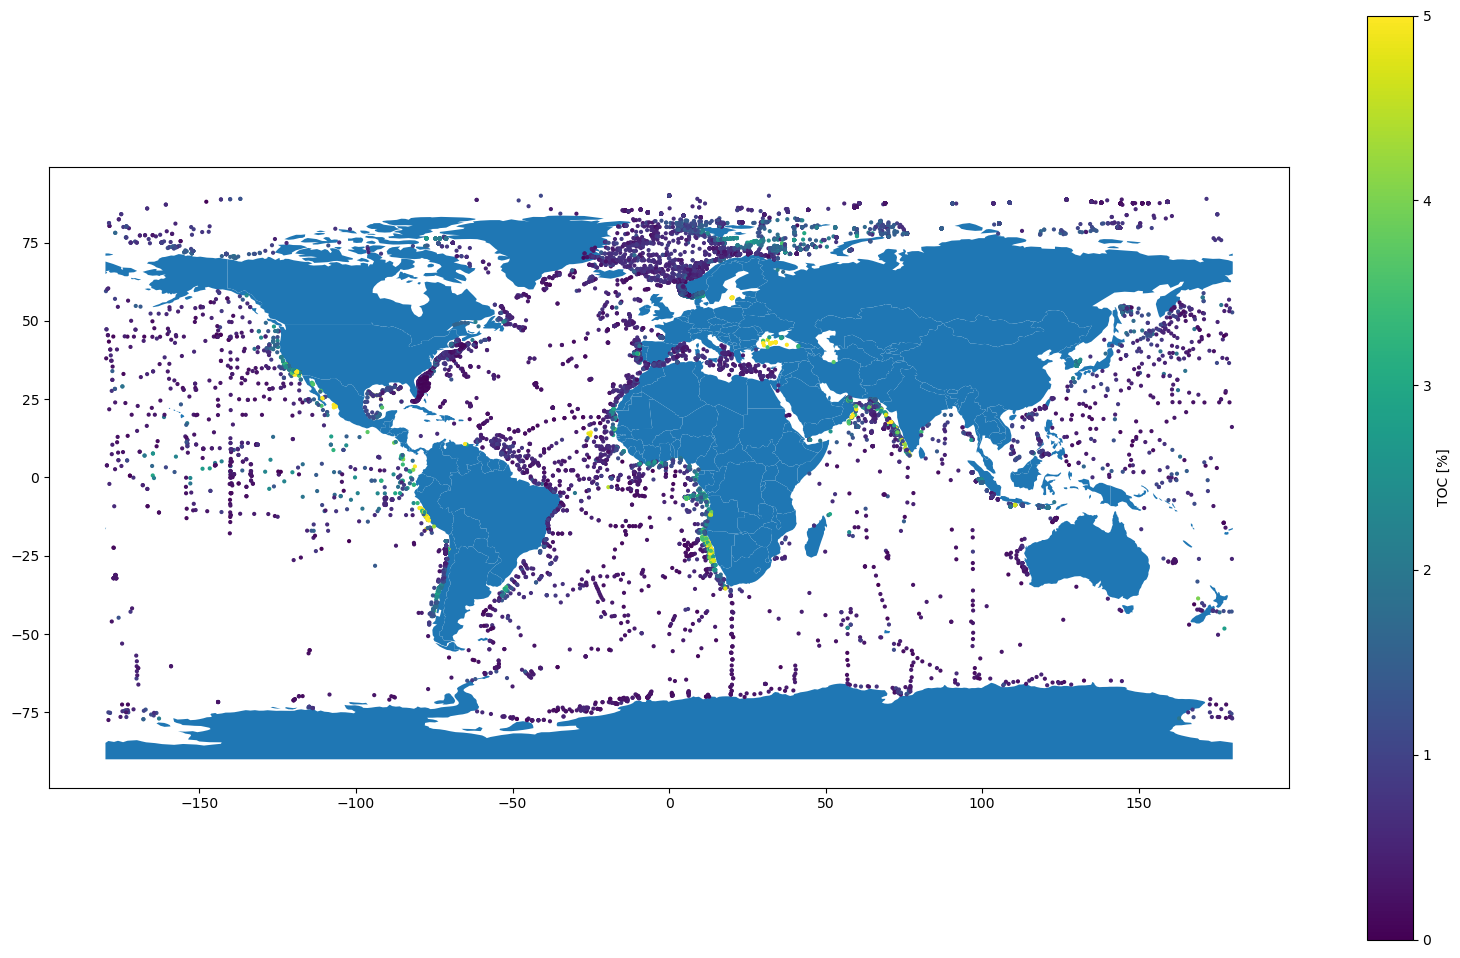

In [4]:
# Plot TOC on map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
plot_toc_on_map(df, world)

In [5]:
# Select features
selected_files = select_features(lee_features_path, feature_selection_path)

Actual number of features
475
Selected number of features
139


In [6]:
# Process features
features, mean, std = process_features(lee_features_path, selected_files, df)

/gxfs_home/cau/sunms498/.conda/envs/pytorch/lib/python3.11/site-packages/xarray/backends/plugins.py:68: RuntimeWarning: Engine 'cfgrib' loading failed:
Cannot find the ecCodes library
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)


file 0 :2N2_ocean_eot20_modified.nc done!
file 1 :ChlorSummerMean.nc done!
file 2 :ChlorWinterMean.nc done!
file 3 :DERIVATIVE_GL_ELEVATION_M_ASL_ETOPO2v2.5.nc done!
file 4 :DERIVATIVE_lithology_grain_size_Everardo_global_8.nc done!
file 5 :GL_COAST_FROM_LAND_IS_1.0_ETOPO2v2.5m.nc done!
file 6 :GL_COAST_FROM_LAND_IS_1.0_ETOPO2v2.r50km.men.5m.nc done!
file 7 :GL_COAST_FROM_SEA_IS_1.0_ETOPO2v2.5m.nc done!
file 8 :GL_COAST_FROM_SEA_IS_1.0_ETOPO2v2.r50km.men.5m.nc done!
file 9 :GL_DIST_TO_COAST_KM_ETOPO.5m.grd done!
file 10 :GL_DIST_TO_COAST_KM_ETOPO.r50km.men.5m.grd done!
file 11 :GL_ELEVATION_M_ASL_ETOPO2v2.5m.grd done!
file 12 :GL_ELEVATION_M_ASL_ETOPO2v2.r50km.men.5m.grd done!
file 13 :GL_ELEVATION_M_ASL_SRTM15+V2.5m.nc done!
file 14 :GL_HEATFLUX_MWM2_Becker.5m.nc done!
file 15 :GL_LAND_IS_1.0_ETOPO2v2.5m.nc done!
file 16 :GL_RIVERMOUTH_CO2_TGCYR-1_ORNL.5m.grd done!
file 17 :GL_RIVERMOUTH_CO2_TGCYR-1_ORNL.r50km.men.5m.grd done!
file 18 :GL_RIVERMOUTH_DOC_TGCYR-1_ORNL.5m.grd done!
file 

In [7]:
# Save processed data
save_data(features, df["TOC [%]"].values, mean, std, save_path)
    